# Please install PROPHET for the code to execute

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from collections import Counter
from sklearn.preprocessing import StandardScaler
orders = pd.read_csv('olist_orders_dataset.csv')
customers = pd.read_csv('olist_customers_dataset.csv')
payments=pd.read_csv('olist_order_payments_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
orders_items = pd.read_csv('olist_order_items_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
geolocation = pd.read_csv('olist_geolocation_dataset.csv', engine='python')

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy import stats
from collections import Counter
import datetime
from sklearn.preprocessing import StandardScaler

In [4]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

In [5]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [6]:
#products['perfumaria'].value_counts()
products.dropna()
perfumelist=products.loc[products['product_category_name'] == 'perfumaria']
orders_items.dropna()
orders.dropna()
sellers.dropna()
products.dropna()
geolocation.dropna()
frequencydict=orders_items['product_id'].value_counts().to_dict()
#print(frequencydict)  just to check
new=perfumelist.merge(orders_items)
photodict=pd.Series(new.product_photos_qty.values,index=new.product_id).to_dict()
#print(photodict) just to check
dfnew =pd.DataFrame(columns=['frequencyofprodid', 'photoqty'])
index=new.shape[0]
count=0
for i in new['product_id']:
    dfnew.loc[count] =[frequencydict[i],photodict[i]]
    count+=1
#dfnew.corr()

In [7]:
bebeslist=products.loc[products['product_category_name'] == 'bebes']

frequencydict=orders_items['product_id'].value_counts().to_dict()
#print(frequencydict)  just to check
new=bebeslist.merge(orders_items)
photodict=pd.Series(new.product_photos_qty.values,index=new.product_id).to_dict()
#print(photodict) just to check
dfnew =pd.DataFrame(columns=['frequencyofprodid', 'photoqty'])
index=new.shape[0]
count=0
for i in new['product_id']:
    dfnew.loc[count] =[frequencydict[i],photodict[i]]
    count+=1

dfnew.corr()

,frequencyofprodid,photoqty
frequencyofprodid,1.000000,0.018334
photoqty,0.018334,1.000000


In [8]:
import numpy
products=products.dropna()
d=products['product_category_name'].unique().tolist()

print(d)

  

['perfumaria', 'artes', 'esporte_lazer', 'bebes', 'utilidades_domesticas', 'instrumentos_musicais', 'cool_stuff', 'moveis_decoracao', 'eletrodomesticos', 'brinquedos', 'cama_mesa_banho', 'construcao_ferramentas_seguranca', 'informatica_acessorios', 'beleza_saude', 'malas_acessorios', 'ferramentas_jardim', 'moveis_escritorio', 'automotivo', 'eletronicos', 'fashion_calcados', 'telefonia', 'papelaria', 'fashion_bolsas_e_acessorios', 'pcs', 'casa_construcao', 'relogios_presentes', 'construcao_ferramentas_construcao', 'pet_shop', 'eletroportateis', 'agro_industria_e_comercio', 'moveis_sala', 'sinalizacao_e_seguranca', 'climatizacao', 'consoles_games', 'livros_interesse_geral', 'construcao_ferramentas_ferramentas', 'fashion_underwear_e_moda_praia', 'fashion_roupa_masculina', 'moveis_cozinha_area_de_servico_jantar_e_jardim', 'industria_comercio_e_negocios', 'telefonia_fixa', 'construcao_ferramentas_iluminacao', 'livros_tecnicos', 'eletrodomesticos_2', 'artigos_de_festas', 'bebidas', 'market_p

In [9]:

### finding correlation between no.of images and sales for a particular product ###

# drop null values
products=products.dropna()

#unique product list
d=products['product_category_name'].unique().tolist()
from scipy.stats import pearsonr
variable=[]
cor=[]
for a in d:
    if a==' ':
        continue
    
    #identifying a particular product
    bebeslist=products.loc[products['product_category_name'] == a]
    
    #frequency of a particular product
    frequencydict=orders_items['product_id'].value_counts().to_dict()
    new=bebeslist.merge(orders_items)
    photodict=pd.Series(new.product_photos_qty.values,index=new.product_id).to_dict()
    dfnew =pd.DataFrame(columns=['frequencyofprodid', 'photoqty'])
    index=new.shape[0]
    count=0
    for i in new['product_id']:
        dfnew.loc[count] =[frequencydict[i],photodict[i]]
        count+=1
    if a==' ':
        continue
    else:
         # calculating correlationcoeeficient
        r = np.corrcoef(dfnew['frequencyofprodid'], dfnew['photoqty'])
        if r[0,1]>0.3:
            print('for',a,r[0, 1].round(2))


for instrumentos_musicais 0.31
for moveis_decoracao 0.41
for construcao_ferramentas_seguranca 0.37
for fashion_bolsas_e_acessorios 0.49
for consoles_games 0.38
for moveis_cozinha_area_de_servico_jantar_e_jardim 0.39
for eletrodomesticos_2 0.34
for artigos_de_festas 0.68
for bebidas 0.37
for construcao_ferramentas_jardim 0.33
for fashion_roupa_feminina 0.76
for portateis_casa_forno_e_cafe 0.85
for dvds_blu_ray 0.35
for artes_e_artesanato 0.79


C:\Users\TANYA\anaconda3\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\TANYA\anaconda3\lib\site-packages\numpy\lib\function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [10]:
orders[['order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date']] = orders[['order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date']]\
        .apply(lambda x: pd.to_datetime(x,errors = 'coerce', format='%Y-%m-%d %H:%M:%S'))\
        .apply(lambda x: x.dt.date)

In [11]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-07-26,2018-07-26,2018-08-07,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-08-08,2018-08-08,2018-08-17,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18,2017-11-18,2017-11-22,2017-12-02,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13,2018-02-13,2018-02-14,2018-02-16,2018-02-26
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09,2017-03-09,2017-03-10,2017-03-17,2017-03-28
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06,2018-02-06,2018-02-07,2018-02-28,2018-03-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27,2017-08-27,2017-08-28,2017-09-21,2017-09-27
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08,2018-01-08,2018-01-12,2018-01-25,2018-02-15


In [12]:
orders=orders.dropna()

In [13]:
from datetime import timedelta
last_date = orders['order_delivered_carrier_date'].max()+ timedelta(days=1)
last_date

datetime.date(2018, 9, 12)

In [14]:
merged_orders = pd.merge(left=payments, right=orders)

In [15]:
merged_orders


,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25,2018-04-25,2018-05-02,2018-05-09,2018-05-22
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26,2018-06-26,2018-06-28,2018-06-29,2018-07-16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12,2017-12-14,2017-12-15,2017-12-18,2018-01-04
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06,2017-12-06,2017-12-07,2017-12-21,2018-01-04
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21,2018-05-21,2018-05-22,2018-06-01,2018-06-13
...,...,...,...,...,...,...,...,...,...,...,...,...
100734,c45067032fd84f4cf408730ff5205568,1,credit_card,2,198.94,0fea3afc6a1510c9db75d349d28af974,delivered,2018-05-16,2018-05-16,2018-05-17,2018-05-22,2018-06-12
100735,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31,5d576cb2dfa3bc05612c392a1ee9c654,delivered,2018-03-08,2018-03-10,2018-03-12,2018-03-16,2018-04-04
100736,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80,2079230c765a88530822a34a4cec2aa0,delivered,2017-08-18,2017-08-18,2017-08-18,2017-08-23,2017-09-12
100737,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54,5d719b0d300663188169c6560e243f27,delivered,2018-08-07,2018-08-07,2018-08-09,2018-08-21,2018-08-24


In [16]:
orders=orders.dropna()
from datetime import timedelta
#find last order date
last_date = orders['order_delivered_carrier_date'].max()+ timedelta(days=1)
merged_orders = pd.merge(left=payments, right=orders)
def rate(row):
    return last_date-row['order_purchase_timestamp']
merged_orders['r'] = merged_orders.apply (lambda row: rate(row), axis=1)
# group based on customer id
merged_orders.groupby('customer_id')['order_purchase_timestamp'].max().reset_index()
merged_orders
merged_orders['r'] = merged_orders.apply (lambda row: rate(row), axis=1)


In [17]:
RFM = merged_orders.dropna(subset=['order_delivered_carrier_date'])\
            .reset_index()\
            .groupby('customer_id')\
            .agg(Recency = ('order_delivered_carrier_date', lambda x: (last_date - x.max()).days ),
                 Frequency = ('order_id', 'size'),
                 Monetary = ('payment_value', 'sum'))


In [18]:
%matplotlib inline
datamart_log = np.log(RFM)
scaler = StandardScaler()
scaler.fit(datamart_log)
datamart_normalized = scaler.transform(datamart_log)
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(datamart_normalized)
    sse[k] = kmeans.inertia_ 

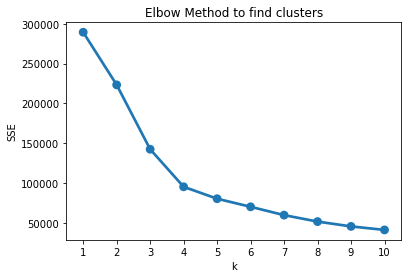

In [19]:
# find number of clusters
plt.title('Elbow Method to find clusters')
plt.xlabel('k'); plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()
###### as can be seen,4 is optimal number of clusters #######

In [20]:
quantiles = RFM.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
div_rfm = RFM
def recent(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
def freqmon(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
div_rfm['rscore'] = div_rfm['Recency'].apply(recent, args=('Recency',quantiles,))
div_rfm['fscore'] = div_rfm['Frequency'].apply(freqmon, args=('Frequency',quantiles,))
div_rfm['mscore'] = div_rfm['Monetary'].apply(freqmon, args=('Monetary',quantiles,))
div_rfm['RFMScore'] = div_rfm.rscore.map(str) + div_rfm.fscore.map(str) + div_rfm.mscore.map(str)
div_rfm

,Recency,Frequency,Monetary,rscore,fscore,mscore,RFMScore
customer_id,,,,,,,
00012a2ce6f8dcda20d059ce98491703,299,1,114.74,3,4,2,342
000161a058600d5901f007fab4c27140,420,1,67.41,4,4,3,443
0001fd6190edaaf884bcaf3d49edf079,560,1,195.42,4,4,1,441
0002414f95344307404f0ace7a26f1d5,389,1,179.35,4,4,1,441
000379cdec625522490c315e70c7a9fb,161,1,107.01,2,4,2,242
...,...,...,...,...,...,...,...
fffcb937e9dd47a13f05ecb8290f4d3e,179,1,91.91,2,4,3,243
fffecc9f79fd8c764f843e9951b11341,165,3,81.36,2,1,3,213
fffeda5b6d849fbd39689bb92087f431,110,1,63.13,1,4,3,143


<AxesSubplot:>

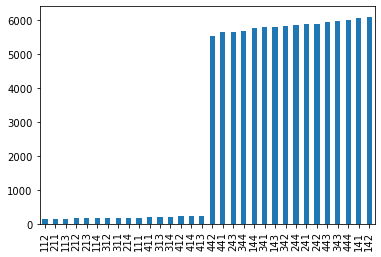

In [21]:
# number of customers for each score
div_rfm['RFMScore'].value_counts(ascending=True).plot(kind='bar')

In [22]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp']) #converting object to python date time (time stamp)
year = orders['order_purchase_timestamp'].dt.year #extracting the year from the created Timestamp above
month = orders['order_purchase_timestamp'].dt.month  #extracting the month 
day = orders['order_purchase_timestamp'].dt.day  #extracting the date(day) 
time = year.astype(str) + "-" + month.astype(str) + "-" + day.astype(str) #concatenating year, month and day to create date 
time = pd.to_datetime(time) #converting String object to TimeStamp
time = time.sort_values() #Sorting the dates
time
#This has been done in order to remove the time (hour:min:sec) at which the customer had ordered. We are concerned primarily with the year-month-day of the purchase. 

30710   2016-09-15
6747    2016-10-03
92636   2016-10-03
33504   2016-10-03
93285   2016-10-03
           ...    
5774    2018-08-29
88412   2018-08-29
31486   2018-08-29
37192   2018-08-29
6883    2018-08-29
Name: order_purchase_timestamp, Length: 96461, dtype: datetime64[ns]

In [23]:
id_time = orders['order_id'].to_frame().join(time) #converting the Timestamps created above to a Data Frame. It is a joint Data Frame of order_id from Orders data set and the TimeStamps
id_time = id_time.sort_values(by = 'order_purchase_timestamp') #Sorting the id_time Data Frame

#creating sperate Data Frames for the three years 2016, 2017 and 2018
id_time_2016 = id_time.iloc[:272,:] 
id_time_2017 = id_time.iloc[273:43683,:]
id_time_2018 = id_time.iloc[43684:,:]

In [24]:
payment_value = pd.DataFrame(payments, columns = ['order_id','payment_value']) #creating a Data Frame from payments Dataset with order_id and payment_value as columns  

In [25]:
payment_value #displaying the Data Frame created above

,order_id,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,65.71
3,ba78997921bbcdc1373bb41e913ab953,107.78
4,42fdf880ba16b47b59251dd489d4441a,128.45
...,...,...
103881,0406037ad97740d563a178ecc7a2075c,363.31
103882,7b905861d7c825891d6347454ea7863f,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,47.77
103884,b8b61059626efa996a60be9bb9320e10,369.54


In [26]:
revenue_2016 = pd.merge(id_time_2016, payment_value, on = "order_id") #merging the 2 Data Frames id_time_2016 (contains order_id and TimeStamp) and payment_value (contains payment value of orders and order_id) on the basis of order_id
revenue_2016 #Displaying the Data Frame created above

,order_id,order_purchase_timestamp,payment_value
0,cd3b8574c82b42fc8129f6d502690c3e,2016-10-03,40.95
1,65d1e226dfaeb8cdc42f665422522d14,2016-10-03,35.61
2,ef1b29b591d31d57c0d7337460dd83c9,2016-10-03,92.27
3,3b697a20d9e427646d92567910af6d57,2016-10-03,45.46
4,a41c8759fbe7aab36ea07e038b2d4465,2016-10-03,53.73
...,...,...,...
283,6460e331ee8f69c01f1423cca48d9991,2016-10-10,20.11
284,b88cd65e1d90bf6e185bf9b6f0b614cd,2016-10-10,40.86
285,45ec58d30f2023e4dac16d956a657ddd,2016-10-10,87.51
286,f883e09a1fb01318052c6ab839efb34a,2016-10-10,45.70


In [27]:
monthly_revenue_2016 = np.zeros(3) #Creating an array for storing the monthly revenue for the 3 months for which we have been provided with data for 2016 (For 2016, we only have data for October, November and December). Hence, an array with 3 elements intialized as zeroes
for i in range(288): #revenue_2016 has 288 rows
    for j in range(10,13):
        if(pd.Timestamp(revenue_2016['order_purchase_timestamp'][i]).month == j): #checking for same month
            monthly_revenue_2016[j-10] += (revenue_2016['payment_value'][i])    #storing monthly payment     

In [28]:
monthly_revenue_2016 #displaying monthly revenue

array([4.72712e+04, 0.00000e+00, 1.96200e+01])

In [29]:
months = np.zeros(3) #creating an array for the 3 months - October, November and December, initialized as zeroes.
for i in range(10,13): #from November (10th Month of the year) to December (12th month of the year)
    months[i-10] = i #storing the month number in the array
months    #displaying the array

array([10., 11., 12.])

In [30]:
from pandas import DataFrame 
months_df = DataFrame(months,columns = ['Month No.']) #creating a Data Frame out of the months array and naming its column as Month No.
monthly_revenue_df = DataFrame(monthly_revenue_2016,columns = ['Monthly Revenue']) #creating a Data Frame out of the monthly_revenue_2016 array and naming its column as Monthly Revenue 
req_df_2016 = pd.concat([months_df, monthly_revenue_df], axis = 1) #concatenating the 2 Data Frames created above into 1 Data Frame
req_df_2016 #displaying the Data Frame created above

,Month No.,Monthly Revenue
0,10.0,47271.20
1,11.0,0.00
2,12.0,19.62


In [31]:
pay_2016 = pd.DataFrame(revenue_2016['payment_value']) #creating a Data Frame for the transactions occured in 2016

In [32]:
pay_2016 #displaying the Data Frame

,payment_value
0,40.95
1,35.61
2,92.27
3,45.46
4,53.73
...,...
283,20.11
284,40.86
285,87.51
286,45.70


In [33]:
pay_2016.describe() #performing basic statistical operations like mean on the transaction values of 2016
#From here we infer that the average order value is approximately 164

,payment_value
count,288.000000
mean,164.204236
std,188.469663
min,0.740000
25%,58.410000
50%,102.065000
75%,182.410000
max,1423.550000


<AxesSubplot:>

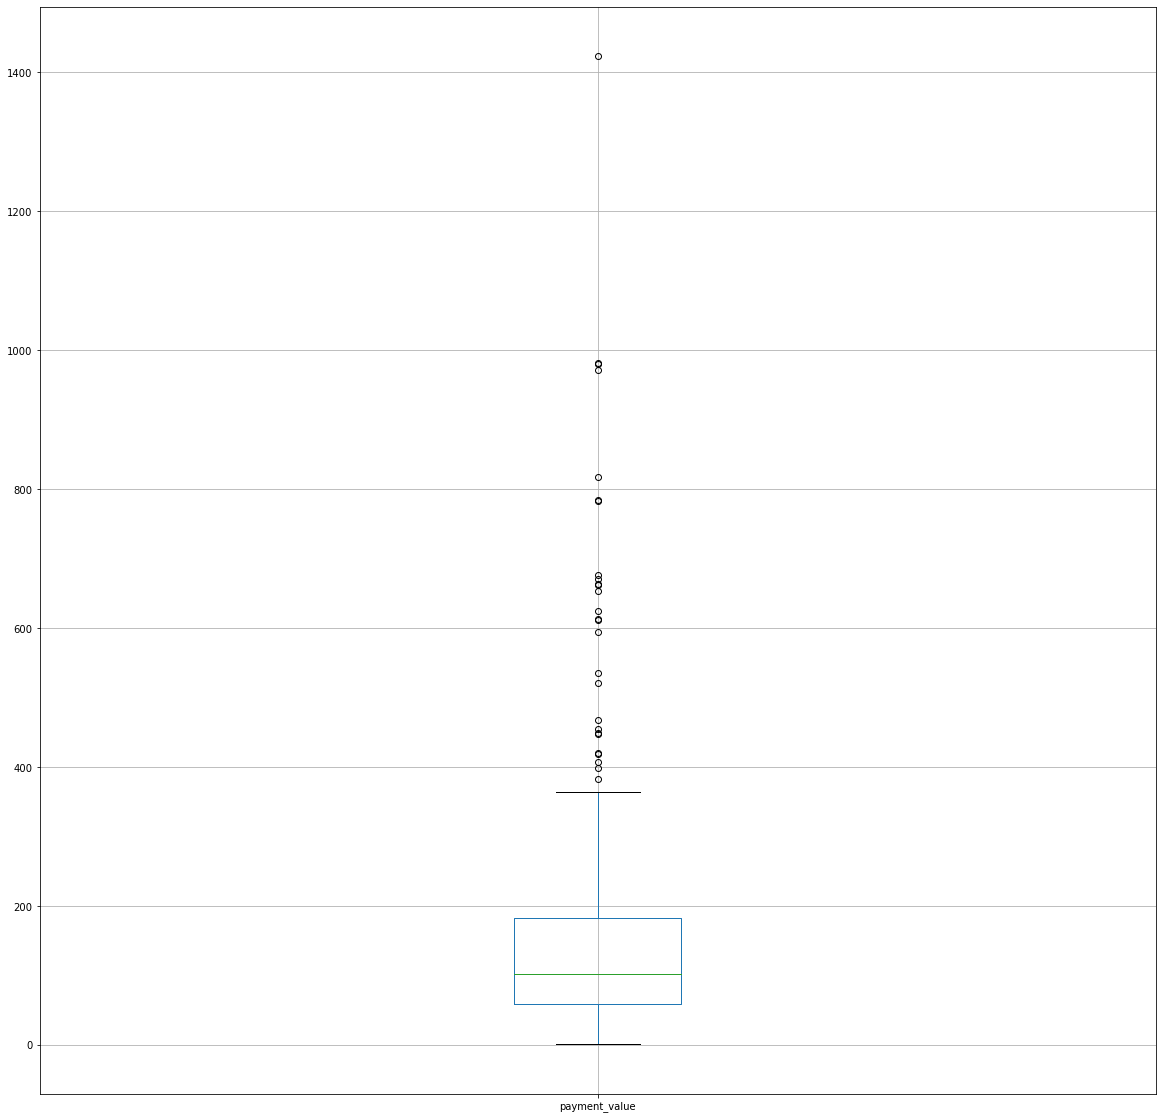

In [34]:
f = plt.figure(figsize=(20,20)) #creating a box plot for displaying the transaction values (thier median, quartiles and outliers)
pay_2016.boxplot()

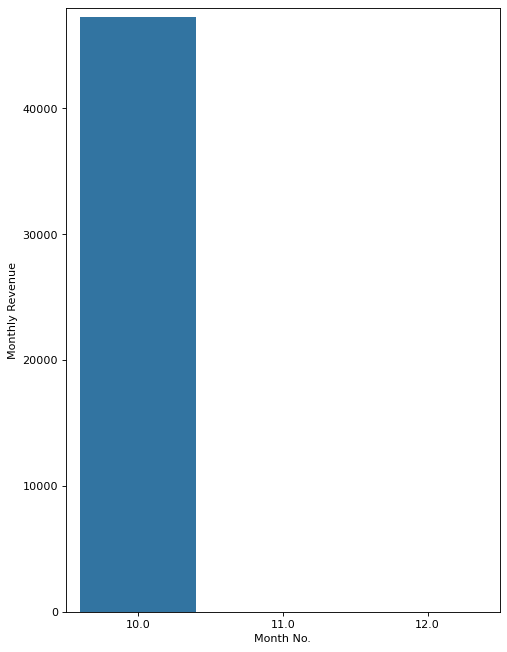

In [35]:
from matplotlib.pyplot import figure #plotting a bar graph for showing the monthly revenue for 2016
figure(figsize=(7, 10), dpi=80)
plt.xlim(0, 12)
plt.ylim(0, 48000)
ax = sns.barplot(x="Month No.", y="Monthly Revenue", data = req_df_2016)
#The monthly revenue for October is the highest, there is no revenue generated for November, while for December the revenue generated is quite less

In [155]:
revenue_2017 = pd.merge(id_time_2017, payment_value, on="order_id") #merging the 2 Data Frames id_time_2017 (contains order_id and TimeStamp) and payment_value (contains payment value of orders and order_id) on the basis of order_id
revenue_2017 #Displaying the Data Frame created above

,order_id,order_purchase_timestamp,payment_value
0,7004296aa0256632eaddc171edaf727f,2017-01-05,19.62
1,34bf4feda1e203af64692d97c6950c39,2017-01-05,19.62
2,9b91ddcbd6cbceb83d4fd2462ca1f95e,2017-01-05,19.62
3,e1fe072ef14b519af1f0a8ed997c1301,2017-01-05,24.42
4,9021fdebb45ac827a6033d6969d5c2e3,2017-01-05,50.95
...,...,...,...
45702,00c2335723b9b74668062e946dc66621,2017-12-31,31.38
45703,b72528954592dd3225bff1b524a08dda,2017-12-31,43.92
45704,b72528954592dd3225bff1b524a08dda,2017-12-31,22.99
45705,890f5964e17264069a75405d83bbce38,2017-12-31,519.72


In [156]:
monthly_revenue = np.zeros(12)  #Creating an array for storing the monthly revenue for the 12 months of the year 2017 (For 2017, we have complete data for all months). Hence, an array with 12 elements intialized as zeroes
for i in range(45707):  #revenue_2016 has 45707 rows
    for j in range(1,13):
        if(pd.Timestamp(revenue_2017['order_purchase_timestamp'][i]).month == j):  #checking for same month
            monthly_revenue[j-1] += (revenue_2017['payment_value'][i]) #storing monthly payment  
monthly_revenue           #displaying monthly revenue

array([ 127414.12,  269458.98,  414369.39,  390952.18,  566872.73,
        490225.6 ,  566403.93,  646000.61,  700976.01,  751140.27,
       1153393.22,  843199.17])

In [157]:
months = np.zeros(12) #creating an array for the 12 months of 2017, initialized as zeroes.
for i in range(1,13):  #from January (1st Month of the year) to December (12th month of the year)
    months[i-1] = i #storing the month number in the array
months   #displaying the array 

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

In [158]:
from pandas import DataFrame
months_df = DataFrame(months,columns = ['Month No.']) #creating a Data Frame out of the months array and naming its column as Month No.
monthly_revenue_df = DataFrame(monthly_revenue,columns = ['Monthly Revenue']) #creating a Data Frame out of the monthly_revenue_2017 array and naming its column as Monthly Revenue
req_df_2017 = pd.concat([months_df, monthly_revenue_df], axis = 1) #concatenating the 2 Data Frames created above into 1 Data Frame
req_df_2017 #displaying the Data Frame created above

,Month No.,Monthly Revenue
0,1.0,127414.12
1,2.0,269458.98
2,3.0,414369.39
3,4.0,390952.18
4,5.0,566872.73
5,6.0,490225.60
6,7.0,566403.93
7,8.0,646000.61
8,9.0,700976.01
9,10.0,751140.27


In [159]:
pay_2017 = pd.DataFrame(revenue_2017['payment_value'])  #creating a Data Frame for the transactions occured in 2017

In [160]:
pay_2017 #displaying the Data Frame

,payment_value
0,19.62
1,19.62
2,19.62
3,24.42
4,50.95
...,...
45702,31.38
45703,43.92
45704,22.99
45705,519.72


In [161]:
pay_2017.describe() #performing basic statistical operations like mean on the transaction values of 2017
#From here we infer that the average order value is approximately 151

,payment_value
count,45707.000000
mean,151.408016
std,220.355338
min,0.000000
25%,55.690000
50%,97.710000
75%,168.200000
max,13664.080000


<AxesSubplot:>

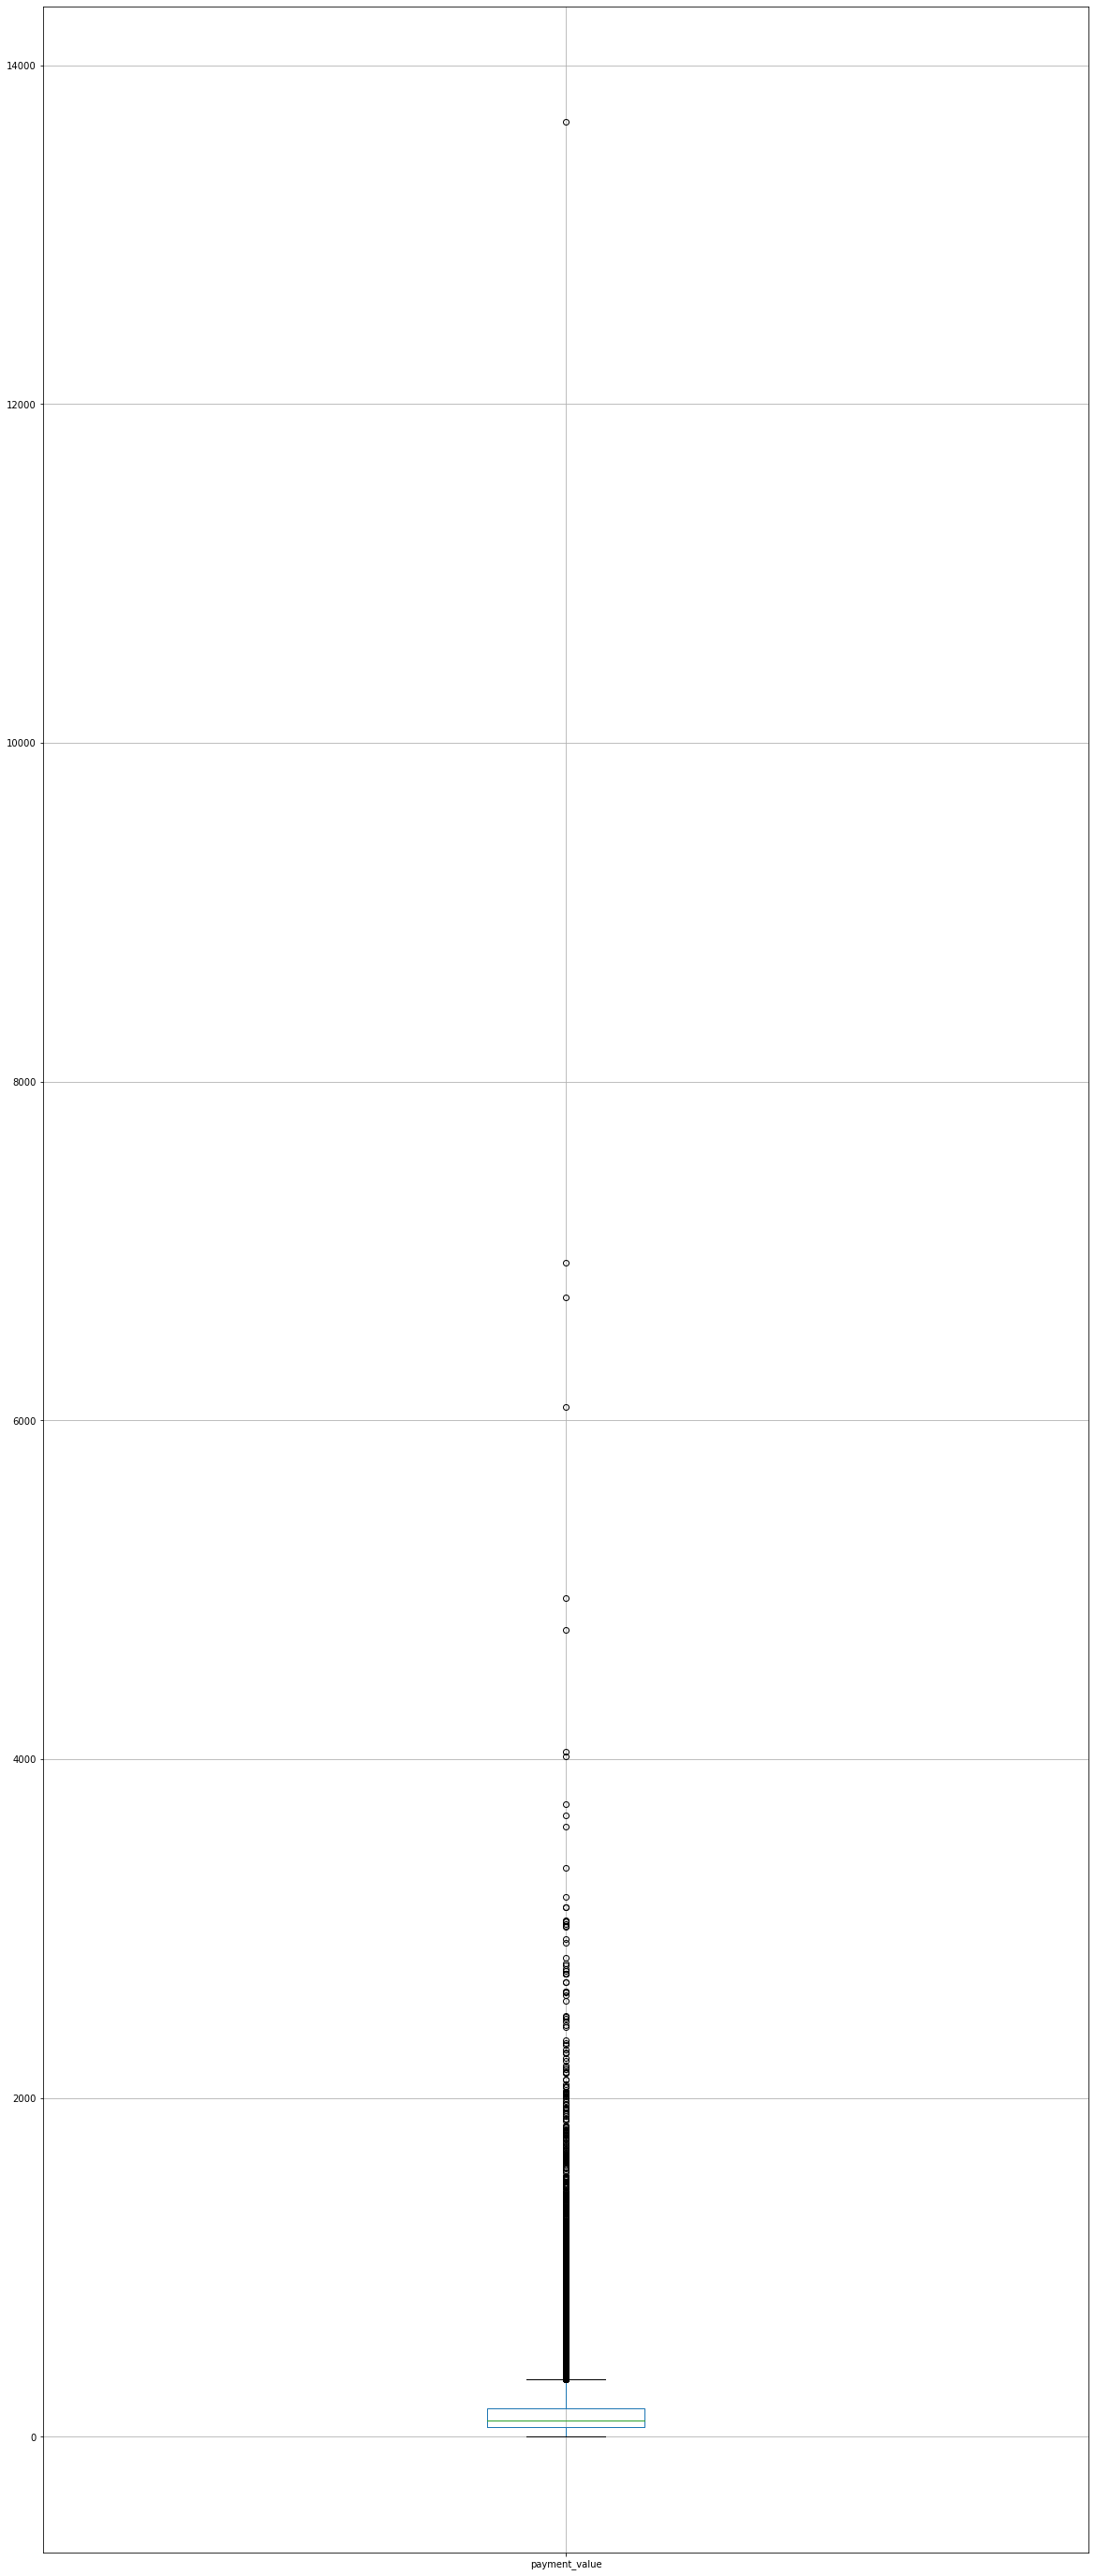

In [162]:
f = plt.figure(figsize=(20,50)) #creating a box plot for displaying the transaction values (thier median, quartiles and outliers)
pay_2017.boxplot()

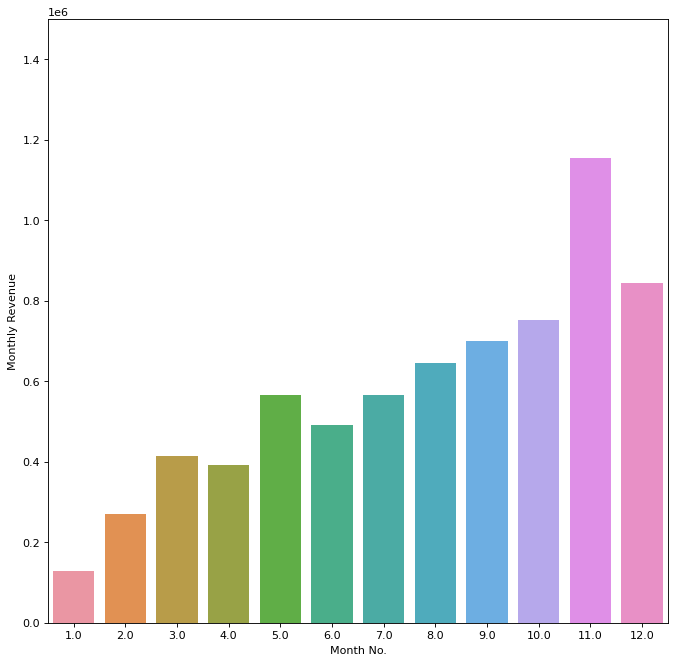

In [163]:
from matplotlib.pyplot import figure #plotting a bar graph for showing the monthly revenue for 2017
figure(figsize=(10, 10), dpi=80)
plt.xlim(0, 12)
plt.ylim(0, 1500000)
ax = sns.barplot(x="Month No.", y="Monthly Revenue", data = req_df_2017)
#The monthly revenue for November is the highest and is least for January 

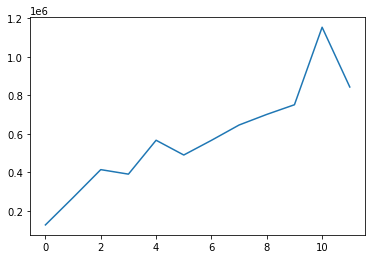

In [164]:
from matplotlib.pyplot import figure
req_df_2017['Monthly Revenue'].plot()
plt.show()   # plotting monthly revenue for 2017

In [165]:
req_df_2017['Month No.']=req_df_2017['Month No.'].astype(str)

for i in range(12):
    m=i+1
    req_df_2017.at[i,'Month No.']=str(2017)+ "-" +str(m)+ "-" +str(1) # adding the year and a standard day (1) to the month number

req_df_2017['Month No.']=pd.to_datetime(req_df_2017['Month No.']) # converting from string to datetime
print(req_df_2017)

    Month No.  Monthly Revenue
0  2017-01-01        127414.12
1  2017-02-01        269458.98
2  2017-03-01        414369.39
3  2017-04-01        390952.18
4  2017-05-01        566872.73
5  2017-06-01        490225.60
6  2017-07-01        566403.93
7  2017-08-01        646000.61
8  2017-09-01        700976.01
9  2017-10-01        751140.27
10 2017-11-01       1153393.22
11 2017-12-01        843199.17


In [166]:
import fbprophet  # importing the forecasting tool
req_df_2017.columns = ['ds', 'y'] # renaming columns according to requirements of prophet
req_df_2017

,ds,y
0,2017-01-01,127414.12
1,2017-02-01,269458.98
2,2017-03-01,414369.39
3,2017-04-01,390952.18
4,2017-05-01,566872.73
5,2017-06-01,490225.60
6,2017-07-01,566403.93
7,2017-08-01,646000.61
8,2017-09-01,700976.01
9,2017-10-01,751140.27


We are using Prophet because it can capture seasonal variations very well even if the user does not specify any parameters. In case of ARIMA, auto ARIMA does not work well with seasonal variations. It could work well if the user specifies the correct parameters.

In [167]:
from fbprophet import Prophet
model = Prophet(yearly_seasonality=True) # including yearly seasonality since data is across a year
model.fit(req_df_2017) # fitting the model on monthly revenue for 2017
# using 2017 data for fitting because all the months have some revenue (as given by the dataset)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 8.


In [168]:
future = list() # list to store timestamp values for prediction
for i in range(1, 13):
    date = '2017-%02d' % i
    future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])

          ds       yhat     yhat_lower     yhat_upper
0 2017-01-01  127414.12  127414.119896  127414.120108
1 2017-02-01  269458.98  269458.979893  269458.980104
2 2017-03-01  414369.39  414369.389896  414369.390106
3 2017-04-01  390952.18  390952.179894  390952.180106
4 2017-05-01  566872.73  566872.729899  566872.730112


<Figure size 1600x1600 with 0 Axes>

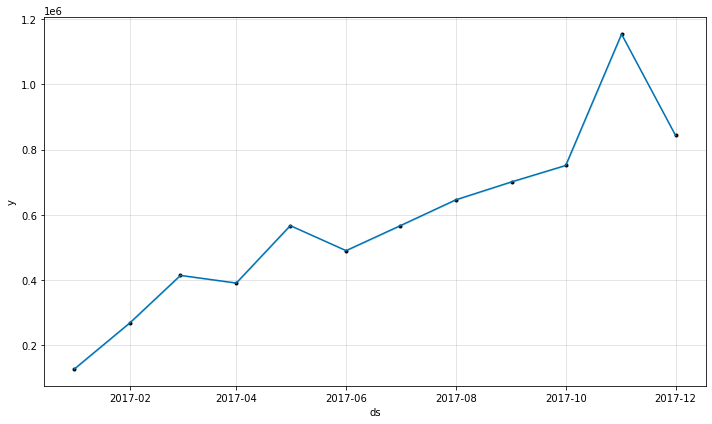

In [169]:
forecast=model.predict(future)  # predicting on the same data to see if the model has learnt properly
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
figure(figsize=(20, 20), dpi=80)
model.plot(forecast)
plt.show()

In [170]:
train = req_df_2017.drop(req_df_2017.index[-5:]) # removing some values from the training set
train

,ds,y
0,2017-01-01,127414.12
1,2017-02-01,269458.98
2,2017-03-01,414369.39
3,2017-04-01,390952.18
4,2017-05-01,566872.73
5,2017-06-01,490225.60
6,2017-07-01,566403.93


In [171]:
for i in range(1, 8):
    date =  i+1
    future.append([date])
future = DataFrame(future)
future.columns = ['ds']

          ds       yhat     yhat_lower     yhat_upper
0 2017-01-01  127414.12  127414.119897  127414.120104
1 2017-02-01  269458.98  269458.979897  269458.980106
2 2017-03-01  414369.39  414369.389892  414369.390101
3 2017-04-01  390952.18  390952.179895  390952.180105
4 2017-05-01  566872.73  566872.729898  566872.730104


<Figure size 1600x1600 with 0 Axes>

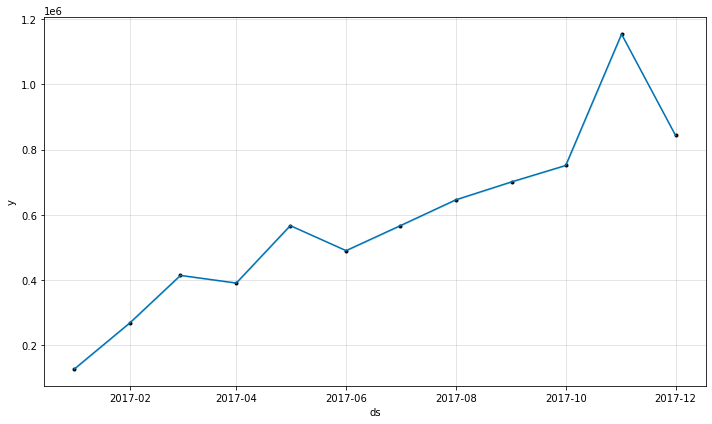

In [172]:
forecast2 = model.predict(future) # predicting again
print(forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
figure(figsize=(20, 20), dpi=80)
model.plot(forecast2)
plt.show() # the result is the same as before

In [173]:
revenue_2018 = pd.merge(id_time_2018, payment_value, on="order_id") #merging the 2 Data Frames id_time_2018 (contains order_id and TimeStamp) and payment_value (contains payment value of orders and order_id) on the basis of order_id
revenue_2018 #Displaying the Data Frame created above

,order_id,order_purchase_timestamp,payment_value
0,4cbf1cc60a2d1704a70e11ee8be1510a,2018-01-01,130.03
1,40f5d5356396abbec18c0c893d329422,2018-01-01,167.20
2,9cf86370700477e2bf11be1e7f3d16e6,2018-01-01,215.04
3,45e4d1d16d017409456807846ea959e9,2018-01-01,153.27
4,dd12ffa175ee0c7931890dd19db54427,2018-01-01,165.80
...,...,...,...
54737,d70442bc5e3cb7438da497cc6a210f80,2018-08-29,14.29
54738,912859fef5a0bd5059b6d48fa79d121a,2018-08-29,178.25
54739,168626408cb32af0ffaf76711caae1dc,2018-08-29,61.29
54740,c84d88553f9878bf2c7ecda2eb211ece,2018-08-29,74.21


In [174]:
months = np.zeros(8) #creating an array for the first 8 months of 2018, initialized as zeroes.
for i in range(1,9):  #from January (1st Month of the year) to August (8th month of the year)
    months[i-1] = i #storing the month number in the array
months    #displaying the array 

array([1., 2., 3., 4., 5., 6., 7., 8.])

In [175]:
monthly_revenue = np.zeros(8) #Creating an array for storing the monthly revenue for the first 8 months of the year 2018 (For 2018, we do not have data for all months). We have data only for the first 8 months of the year. Hence, an array with 8 elements intialized as zeroes. 
for i in range(54742): #revenue_2018 has 54742 rows
    for j in range(1,9):
        if(pd.Timestamp(revenue_2018['order_purchase_timestamp'][i]).month == j): #checking for same month
            monthly_revenue[j-1] += (revenue_2018['payment_value'][i]) #storing monthly payment 
monthly_revenue            #displaying monthly revenue

array([1078499.91      ,  966554.97      , 1120677.99999999,
       1132933.95      , 1128836.69      , 1011561.35      ,
       1027383.1       ,  985414.28      ])

In [176]:
from pandas import DataFrame
months_df = DataFrame(months,columns = ['Month No.'])  #creating a Data Frame out of the months array and naming its column as Month No.
monthly_revenue_df = DataFrame(monthly_revenue,columns = ['Monthly Revenue']) #creating a Data Frame out of the monthly_revenue_2017 array and naming its column as Monthly Revenue
req_df_2018 = pd.concat([months_df, monthly_revenue_df], axis = 1) #concatenating the 2 Data Frames created above into 1 Data Frame
req_df_2018 #displaying the Data Frame created above

,Month No.,Monthly Revenue
0,1.0,1078499.91
1,2.0,966554.97
2,3.0,1120678.00
3,4.0,1132933.95
4,5.0,1128836.69
5,6.0,1011561.35
6,7.0,1027383.10
7,8.0,985414.28


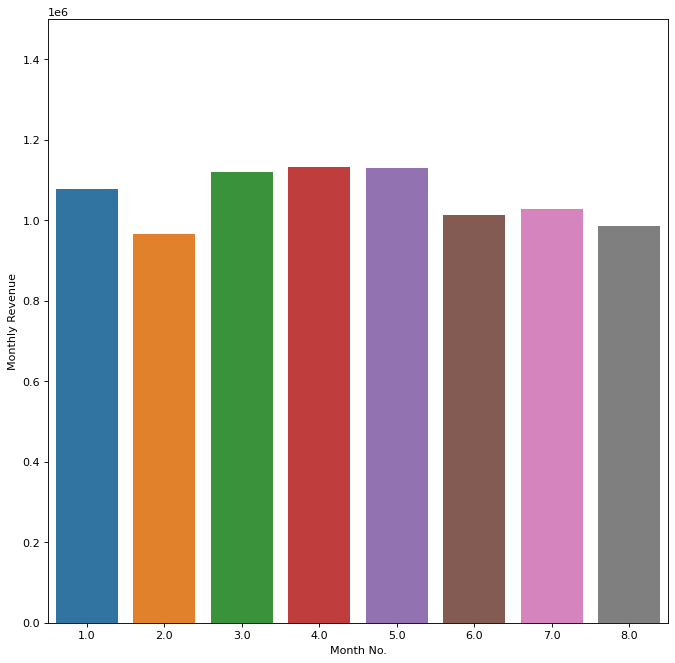

In [177]:
from matplotlib.pyplot import figure
figure(figsize=(10, 10), dpi=80)
plt.xlim(0, 8)
plt.ylim(0, 1500000)
ax = sns.barplot(x="Month No.", y="Monthly Revenue", data = req_df_2018) # barplot of monthly revenue for 2018
#The monthly revenue for April is the highest and is least for February

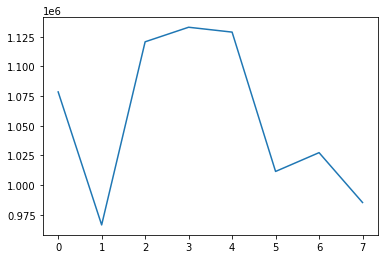

In [178]:
from matplotlib.pyplot import figure

req_df_2018['Monthly Revenue'].plot()  # plotting monthly revenue for 2018
plt.show()

In [179]:
req_df_2018['Month No.']=req_df_2018['Month No.'].astype(str)

for i in range(12):
    m=i+1
    req_df_2018.at[i,'Month No.']=str(2018)+ "-" +str(m)+ "-" +str(1) # adding the year and a standard day (1) to the month number

req_df_2018['Month No.']=pd.to_datetime(req_df_2018['Month No.']) # converting from string to datetime
print(req_df_2018)

req_df_2018.columns = ['ds', 'y'] # renaming columns according to requirements of prophet
req_df_2018

    Month No.  Monthly Revenue
0  2018-01-01       1078499.91
1  2018-02-01        966554.97
2  2018-03-01       1120678.00
3  2018-04-01       1132933.95
4  2018-05-01       1128836.69
5  2018-06-01       1011561.35
6  2018-07-01       1027383.10
7  2018-08-01        985414.28
8  2018-09-01              NaN
9  2018-10-01              NaN
10 2018-11-01              NaN
11 2018-12-01              NaN


,ds,y
0,2018-01-01,1078499.91
1,2018-02-01,966554.97
2,2018-03-01,1120678.00
3,2018-04-01,1132933.95
4,2018-05-01,1128836.69
5,2018-06-01,1011561.35
6,2018-07-01,1027383.10
7,2018-08-01,985414.28
8,2018-09-01,NaN
9,2018-10-01,NaN


          ds           yhat     yhat_lower     yhat_upper
0 2018-01-01  291240.019708  291240.018793  291240.020668
1 2018-02-01  572479.996442  572479.993431  572479.999654
2 2018-03-01  312783.221446  312783.215630  312783.227781
3 2018-04-01  341772.904127  341772.894241  341772.914409
4 2018-05-01  839063.323371  839063.310587  839063.338172


<Figure size 1600x1600 with 0 Axes>

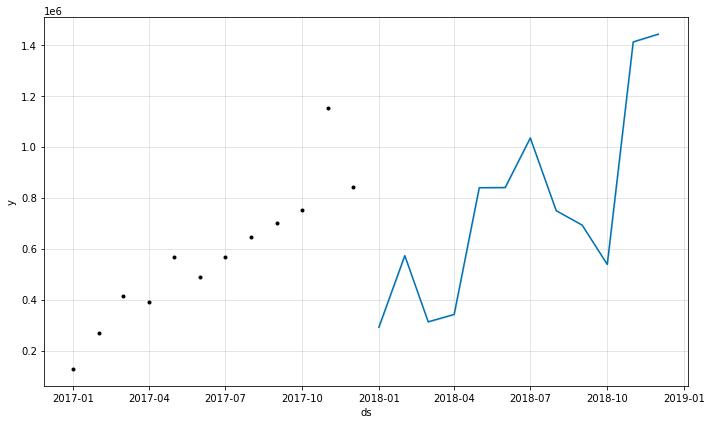

In [180]:
future = list() # list to store timestamp values for prediction
for i in range(1, 13):
    date = '2018-%02d' % i
    future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])
forecast=model.predict(future) # predicting monthly revenue for 2018
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
figure(figsize=(20, 20), dpi=80)
model.plot(forecast) 
plt.show()

In [181]:
forecast['yhat'].values

array([ 291240.01970793,  572479.99644242,  312783.22144588,
        341772.90412745,  839063.32337129,  839716.87526797,
       1034165.31972565,  748882.78393444,  692302.13065105,
        538139.19805114, 1411115.52747837, 1441553.34947219])

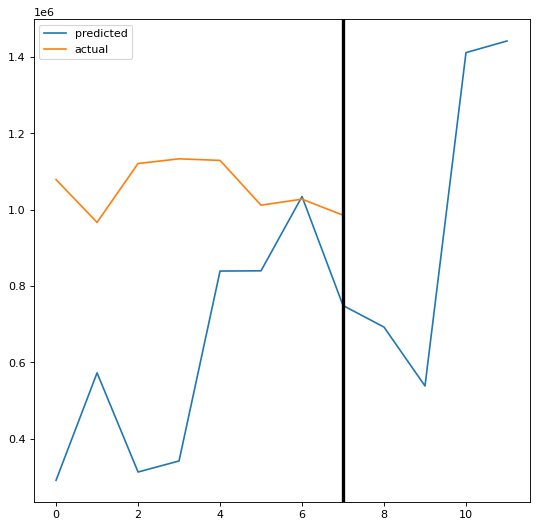

In [182]:
figure(figsize=(8, 8), dpi=80) 
pred=forecast['yhat'].values
plt.plot(pred,label="predicted")
plt.plot(req_df_2018['y'],label="actual") # plotting the actual and predicted monthly revenue for 2018
plt.axvline(7, color='k',lw=3) # the line shows the last month whose revenue is given in the dataset i.e. August
plt.legend()
plt.show()

The conclusion is that the model predicts perfectly on the training data because it was trained on it. But for predictions on other data, it does not do well if a similar trend is not followed. For example in the 2018 monthly revenue data, the revenue for January starts out quite high compared to 2017, but it is predicted to be low by the model. The contours of the prediction are similar to the 2017 data (not exactly same). But since the 2018 data is different from the 2017 data, the prediction is not correct. If the model had more data to learn from, it would have given better predictions for any general dataset.

In [183]:
pay_2018 = pd.DataFrame(revenue_2018['payment_value']) #creating a Data Frame for the transactions occured in 2018

In [184]:
pay_2018 #displaying the Data Frame

,payment_value
0,130.03
1,167.20
2,215.04
3,153.27
4,165.80
...,...
54737,14.29
54738,178.25
54739,61.29
54740,74.21


In [185]:
pay_2018.describe() #performing basic statistical operations like mean on the transaction values of 2017
#From here we infer that the average order value is approximately 154

,payment_value
count,54742.000000
mean,154.394473
std,209.548085
min,0.000000
25%,57.600000
50%,102.030000
75%,173.270000
max,7274.880000


<AxesSubplot:>

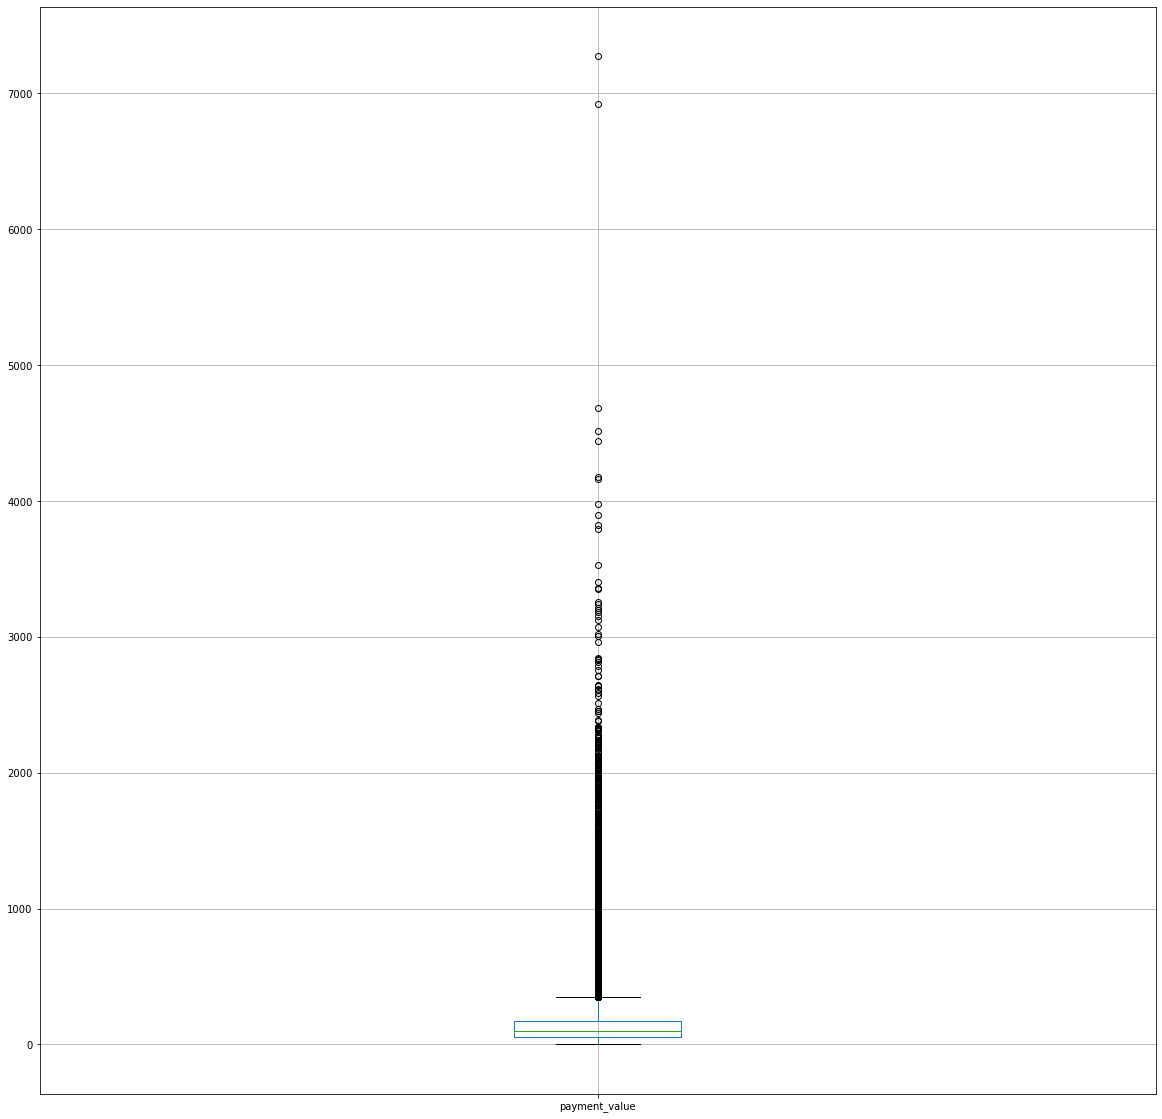

In [186]:
f = plt.figure(figsize=(20,20)) #creating a box plot for displaying the transaction values (thier median, quartiles and outliers)
pay_2018.boxplot()

In [74]:
product_category_id = pd.DataFrame(products, columns = ['product_id','product_category_name']) #creating a Data Frame from products Dataset with product_id and product_category_name as columns
product_id_order_id = pd.DataFrame(orders_items, columns = ['order_id','product_id']) #creating a Data Frame from orders_items Dataset with product_id and order_id as columns

In [75]:
product_category_order_id = pd.merge(product_category_id, product_id_order_id, on="product_id") #merging the 2 Data Frames created above to a single Data Frame on the basis of product_id

In [76]:
product_category_order_id #displaying the Data Frame created above 

,product_id,product_category_name,order_id
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,e17e4f88e31525f7deef66779844ddce
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,5236307716393b7114b53ee991f36956
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,01f66e58769f84129811d43eefd187fb
3,cef67bcfe19066a932b7673e239eb23d,bebes,143d00a4f2dde4e0364ee1821577adb3
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,86cafb8794cb99a9b1b77fc8e48fbbbb
...,...,...,...
111041,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,59e88b7d3675e89aceaf86f372d3bc9a
111042,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,6e4465d771f02e4fe335225de3c6c043
111043,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,6e4465d771f02e4fe335225de3c6c043
111044,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,6e4465d771f02e4fe335225de3c6c043


In [77]:
product_category_order_id_revenue = pd.merge(revenue_2016, product_category_order_id, on="order_id") #merging the revenue_2016 and product_category_order_id Data Frames on the basis of order_id

In [78]:
product_category_order_id_revenue #displaying the Data Frame created above

,order_id,order_purchase_timestamp,payment_value,product_id,product_category_name
0,cd3b8574c82b42fc8129f6d502690c3e,2016-10-03,40.95,e2a1d45a73dc7f5a7f9236b043431b89,fashion_calcados
1,65d1e226dfaeb8cdc42f665422522d14,2016-10-03,35.61,9c7bdf67b06b419aefb93cfdfc96c55d,esporte_lazer
2,ef1b29b591d31d57c0d7337460dd83c9,2016-10-03,92.27,bfce5e847034e1fbbc1ed0bff6a372c7,moveis_decoracao
3,3b697a20d9e427646d92567910af6d57,2016-10-03,45.46,3ae08df6bcbfe23586dd431c40bddbb7,relogios_presentes
4,a41c8759fbe7aab36ea07e038b2d4465,2016-10-03,53.73,b72b39418216e944bb34e35f4d3ea8c7,esporte_lazer
...,...,...,...,...,...
330,6460e331ee8f69c01f1423cca48d9991,2016-10-10,20.11,6b2c1aa8429875eb5ade006973f8bad8,telefonia_fixa
331,b88cd65e1d90bf6e185bf9b6f0b614cd,2016-10-10,40.86,57e5c7033739b88d673eba67e9cf9376,telefonia
332,45ec58d30f2023e4dac16d956a657ddd,2016-10-10,87.51,afad7a4420a4348d41da23ed8d0902dd,moveis_decoracao
333,f883e09a1fb01318052c6ab839efb34a,2016-10-10,45.70,d984b9203bd56960bbdda0bb7f05f781,fashion_bolsas_e_acessorios


In [79]:
Products_df = DataFrame(products, columns = ['product_category_name']) #creating a Data Frame from products Dataset with product_category_name as column

In [80]:
#creating a dictionary with 71 key-value pairs. The keys are the different product categories and the value is a list with 3 elements (for 2016, we only have data for 3 months)
product_category = {"beleza_saude": [0,0,0], " informatica_acessorios": [0,0,0], "automotivo": [0,0,0], "cama_mesa_banho": [0,0,0],
                   "moveis_decoracao":[0,0,0], "esporte_lazer": [0,0,0], "perfumaria": [0,0,0], "utilidades_domesticas": [0,0,0], "telefonia": [0,0,0], "relogios_presentes": [0,0,0],
                    "alimentos_bebidas": [0,0,0], "bebes": [0,0,0], "papelaria": [0,0,0], "tablets_impressao_imagem": [0,0,0], "brinquedos": [0,0,0], "telefonia_fixa": [0,0,0], "ferramentas_jardim": [0,0,0], "fashion_bolsas_e_acessorios": [0,0,0], "eletroportateis": [0,0,0], 
                    "consoles_games": [0,0,0], "audio": [0,0,0], "fashion_calcados": [0,0,0], "cool_stuff": [0,0,0], "malas_acessorios": [0,0,0], "climatizacao": [0,0,0], "construcao_ferramentas_construcao": [0,0,0], "moveis_cozinha_area_de_servico_jantar_e_jardim": [0,0,0], "construcao_ferramentas_jardim": [0,0,0], "fashion_roupa_masculina": [0,0,0], "pet_shop": [0,0,0], "moveis_escritorio": [0,0,0], "market_place": [0,0,0], "eletronicos": [0,0,0], "eletrodomesticos": [0,0,0], "artigos_de_festas": [0,0,0], "casa_conforto": [0,0,0], "construcao_ferramentas_ferramentas": [0,0,0], "agro_industria_e_comercio": [0,0,0], 
                    "moveis_colchao_e_estofado": [0,0,0],  "livros_tecnicos": [0,0,0], "casa_construcao": [0,0,0], "instrumentos_musicais": [0,0,0], "moveis_sala": [0,0,0], "construcao_ferramentas_iluminacao": [0,0,0], "industria_comercio_e_negocios": [0,0,0], "alimento": [0,0,0], "artes": [0,0,0], "moveis_quarto": [0,0,0], "livros_interesse_geral": [0,0,0], "construcao_ferramentas_seguranca": [0,0,0], "fashion_underwear_e_moda_praia": [0,0,0], "fashion_esporte": [0,0,0], "sinalizacao_e_seguranca": [0,0,0], "pcs": [0,0,0], "artigos_de_natal": [0,0,0], "fashion_roupa_feminina": [0,0,0], "eletrodomesticos_2": [0,0,0], "livros_importados": [0,0,0], "bebidas": [0,0,0], "cine_foto": [0,0,0], "la_cuisine": [0,0,0], "musica": [0,0,0], "casa_conforto_2": [0,0,0], "portateis_casa_forno_e_cafe": [0,0,0], "cds_dvds_musicais": [0,0,0], "dvds_blu_ray": [0,0,0], "flores": [0,0,0], "artes_e_artesanato": [0,0,0], "fraldas_higiene": [0,0,0], "fashion_roupa_infanto_juvenil": [0,0,0], "seguros_e_servicos": [0,0,0]}

In [81]:
for i in range(335): #product_category_order_id_revenue has 335 rows
    for key in product_category: #for each product category
        if(key == product_category_order_id_revenue['product_category_name'][i]): #if product category matches with the product category in product_category_order_id_revenue 
            month = product_category_order_id_revenue['order_purchase_timestamp'].dt.month[i] #find out the month of purchase from product_category_order_id_revenue Data Frame
            product_category[key][month-10] +=  product_category_order_id_revenue['payment_value'][i] #add the revenue at the appropriate index in the list (which is the value for product_category dictionary) 

In [82]:
product_category #display the dictionary

{'beleza_saude': [4834.91, 0, 0],
 ' informatica_acessorios': [0, 0, 0],
 'automotivo': [1351.27, 0, 0],
 'cama_mesa_banho': [2291.7100000000005, 0, 0],
 'moveis_decoracao': [10699.610000000002, 0, 0],
 'esporte_lazer': [2526.3699999999994, 0, 0],
 'perfumaria': [6617.510000000002, 0, 0],
 'utilidades_domesticas': [2736.52, 0, 0],
 'telefonia': [443.0900000000001, 0, 0],
 'relogios_presentes': [2793.71, 0, 0],
 'alimentos_bebidas': [0, 0, 0],
 'bebes': [1850.71, 0, 0],
 'papelaria': [0, 0, 0],
 'tablets_impressao_imagem': [0, 0, 0],
 'brinquedos': [5387.41, 0, 0],
 'telefonia_fixa': [774.4499999999999, 0, 0],
 'ferramentas_jardim': [1465.1899999999998, 0, 0],
 'fashion_bolsas_e_acessorios': [738.7500000000001, 0, 19.62],
 'eletroportateis': [0, 0, 0],
 'consoles_games': [3785.3599999999997, 0, 0],
 'audio': [183.03000000000003, 0, 0],
 'fashion_calcados': [40.95, 0, 0],
 'cool_stuff': [1245.1799999999998, 0, 0],
 'malas_acessorios': [0, 0, 0],
 'climatizacao': [3872.8300000000004, 0, 0

In [83]:
product_category_month = { "1": "", "2": "", "3": ""} #dictionary for the storing the product category sold the most for 3 months - October, November and December

In [84]:
maxv = {"0": [0], "1": [0], "2": [0]} #This dictionary will store the revenue generated by the category generating the maximum revenue for the 3 different months 

In [85]:
months = {"1": [10], "2": [11], "3": [12]} #dictionary for months

In [86]:
for key1 in product_category_month: #for every key in product_category_month 
    maxval = 0 #initializing defalult value
    cat = '' #initializing defalult value
    for key in product_category: #for every key in product_category dictionary ( 71 different product categories)
        if(maxval < product_category[key][(int)(key1)-1]): #checking for maximum revenue product_category wise
            maxval = product_category[key][(int)(key1)-1] #updating the maximum revenue 
            cat = key #updating the category
   #after checking all product categories, we have the product category which generates the maximum revenue for a particuar month
    product_category_month[key1] += cat #store the category in the product_category_month dictionary
    maxv[str((int)(key1)-1)][0] += maxval #store the maximum revenue in the maxv dictionary
        

In [87]:
maxv #display the maxv dictionary

{'0': [10699.610000000002], '1': [0], '2': [19.62]}

In [88]:
maxv_df = pd.DataFrame(data=maxv).T #creating a Data Frame from a dictionary and Transposing it

In [89]:
maxv_df.columns = ["Revenue"] #rename the column of the Data Frame created above

In [90]:
maxv_df #display the Data Frame

,Revenue
0,10699.61
1,0.00
2,19.62


In [91]:
months = np.zeros(3) #creating an array for the 3 months - October, November and December, initialized as zeroes.
for i in range(10,13): #from November (10th Month of the year) to December (12th month of the year)
    months[i-10] = i #storing the month number in the array
months    #displaying the array

array([10., 11., 12.])

In [92]:
months_DataFrame = pd.DataFrame(data=months) #creating a Data Frame from the months array 

In [93]:
months_DataFrame.columns = ["Month No."] #renaming the column of the months_DataFrame Data Frame created above

In [94]:
months_DataFrame #displaying the months_DataFrame Data Frame

,Month No.
0,10.0
1,11.0
2,12.0


In [95]:
#resetting the indexes for concatenating the 2 Data Frames (months_DataFrame and maxv_df) together
months_DataFrame.reset_index(drop=True, inplace=True)
maxv_df.reset_index(drop=True, inplace=True)

In [96]:
req_df_2016 = pd.concat([months_DataFrame, maxv_df],axis = 1) #concatenating the 2 Data Frames (months_DataFrame and maxv_df) together

In [97]:
req_df_2016 #displaying the req_df_2016 together

,Month No.,Revenue
0,10.0,10699.61
1,11.0,0.00
2,12.0,19.62


In [98]:
product_category_month #displaying the product_category_month dictionary

{'1': 'moveis_decoracao', '2': '', '3': 'fashion_bolsas_e_acessorios'}

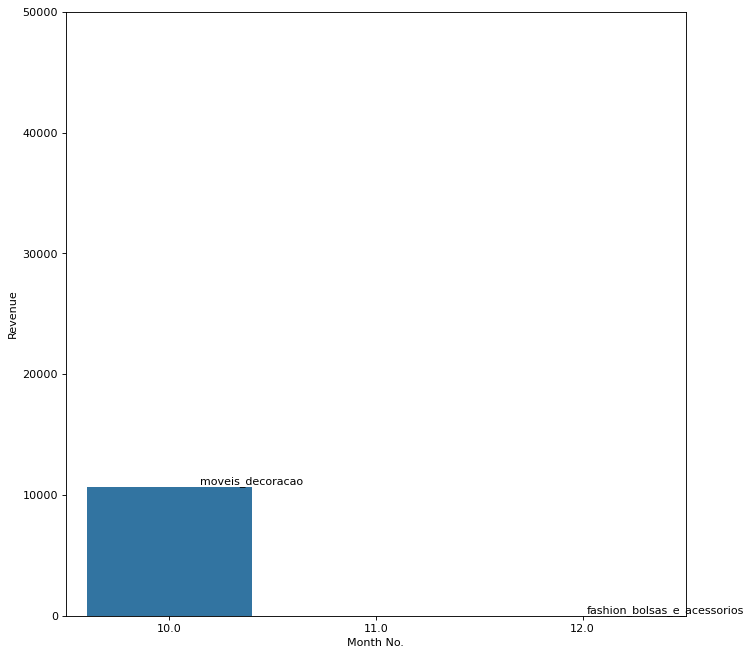

In [99]:
figure(figsize=(10, 10), dpi=80) 
plt.xlim(0, 12)
plt.ylim(0, 50000)
ax = sns.barplot(x="Month No.", y="Revenue", data = req_df_2016) #plotting a bar graph for showing the categories sold the most (month-wise) in 2016
labels = ["moveis_decoracao", "", "fashion_bolsas_e_acessorios"] #setting the categories as labels for the bar graph
rects = ax.patches
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width(), height, label,
            ha='center', va='bottom')
#In October, moveis_decoracao is the most sold product category, while in December fashion_bolsas_e_acessorios is the most sold product category. Their corresponding revenue is also displayed in the bar graph below.   

In [100]:
product_category_order_id_revenue = pd.merge(revenue_2017, product_category_order_id, on="order_id") #merging the revenue_2017 and product_category_order_id Data Frames on the basis of order_id

In [101]:
product_category_order_id_revenue  #displaying the Data Frame created above

,order_id,order_purchase_timestamp,payment_value,product_id,product_category_name
0,7004296aa0256632eaddc171edaf727f,2017-01-05,19.62,f5d8f4fbc70ca2a0038b9a0010ed5cb0,fashion_bolsas_e_acessorios
1,34bf4feda1e203af64692d97c6950c39,2017-01-05,19.62,f5d8f4fbc70ca2a0038b9a0010ed5cb0,fashion_bolsas_e_acessorios
2,9b91ddcbd6cbceb83d4fd2462ca1f95e,2017-01-05,19.62,f5d8f4fbc70ca2a0038b9a0010ed5cb0,fashion_bolsas_e_acessorios
3,e1fe072ef14b519af1f0a8ed997c1301,2017-01-05,24.42,743801b34cc44776de511ba8eff778e2,moveis_quarto
4,9021fdebb45ac827a6033d6969d5c2e3,2017-01-05,50.95,49e142d8098b20ff2dc9ec73cdd5afec,brinquedos
...,...,...,...,...,...
51190,00c2335723b9b74668062e946dc66621,2017-12-31,31.38,b944aabf1fc45c01599ee96c7f4d533e,eletronicos
51191,b72528954592dd3225bff1b524a08dda,2017-12-31,43.92,c706d50b57c9e83293c2586d01f32445,papelaria
51192,b72528954592dd3225bff1b524a08dda,2017-12-31,22.99,c706d50b57c9e83293c2586d01f32445,papelaria
51193,890f5964e17264069a75405d83bbce38,2017-12-31,519.72,8b7a9eed0d30c43346eb8de2d821b2fb,moveis_cozinha_area_de_servico_jantar_e_jardim


In [102]:
#creating a dictionary with 71 key-value pairs. The keys are the different product categories and the value is a list with 12 elements (for 2017, we have data for all 12 months)
product_category = {"beleza_saude": [0,0,0,0,0,0,0,0,0,0,0,0], " informatica_acessorios": [0,0,0,0,0,0,0,0,0,0,0,0], "automotivo": [0,0,0,0,0,0,0,0,0,0,0,0], "cama_mesa_banho": [0,0,0,0,0,0,0,0,0,0,0,0],
                   "moveis_decoracao": [0,0,0,0,0,0,0,0,0,0,0,0], "esporte_lazer": [0,0,0,0,0,0,0,0,0,0,0,0], "perfumaria": [0,0,0,0,0,0,0,0,0,0,0,0], "utilidades_domesticas": [0,0,0,0,0,0,0,0,0,0,0,0], "telefonia": [0,0,0,0,0,0,0,0,0,0,0,0], "relogios_presentes": [0,0,0,0,0,0,0,0,0,0,0,0],
                    "alimentos_bebidas": [0,0,0,0,0,0,0,0,0,0,0,0], "bebes": [0,0,0,0,0,0,0,0,0,0,0,0], "papelaria": [0,0,0,0,0,0,0,0,0,0,0,0], "tablets_impressao_imagem": [0,0,0,0,0,0,0,0,0,0,0,0], "brinquedos": [0,0,0,0,0,0,0,0,0,0,0,0], "telefonia_fixa": [0,0,0,0,0,0,0,0,0,0,0,0], "ferramentas_jardim": [0,0,0,0,0,0,0,0,0,0,0,0], "fashion_bolsas_e_acessorios": [0,0,0,0,0,0,0,0,0,0,0,0], "eletroportateis": [0,0,0,0,0,0,0,0,0,0,0,0], 
                    "consoles_games": [0,0,0,0,0,0,0,0,0,0,0,0], "audio": [0,0,0,0,0,0,0,0,0,0,0,0], "fashion_calcados": [0,0,0,0,0,0,0,0,0,0,0,0], "cool_stuff": [0,0,0,0,0,0,0,0,0,0,0,0], "malas_acessorios": [0,0,0,0,0,0,0,0,0,0,0,0], "climatizacao": [0,0,0,0,0,0,0,0,0,0,0,0], "construcao_ferramentas_construcao": [0,0,0,0,0,0,0,0,0,0,0,0], "moveis_cozinha_area_de_servico_jantar_e_jardim": [0,0,0,0,0,0,0,0,0,0,0,0], "construcao_ferramentas_jardim": [0,0,0,0,0,0,0,0,0,0,0,0], "fashion_roupa_masculina": [0,0,0,0,0,0,0,0,0,0,0,0], "pet_shop": [0,0,0,0,0,0,0,0,0,0,0,0], "moveis_escritorio": [0,0,0,0,0,0,0,0,0,0,0,0], "market_place": [0,0,0,0,0,0,0,0,0,0,0,0], "eletronicos": [0,0,0,0,0,0,0,0,0,0,0,0], "eletrodomesticos": [0,0,0,0,0,0,0,0,0,0,0,0], "artigos_de_festas": [0,0,0,0,0,0,0,0,0,0,0,0], "casa_conforto": [0,0,0,0,0,0,0,0,0,0,0,0], "construcao_ferramentas_ferramentas": [0,0,0,0,0,0,0,0,0,0,0,0], "agro_industria_e_comercio": [0,0,0,0,0,0,0,0,0,0,0,0], 
                    "moveis_colchao_e_estofado": [0,0,0,0,0,0,0,0,0,0,0,0],  "livros_tecnicos": [0,0,0,0,0,0,0,0,0,0,0,0], "casa_construcao": [0,0,0,0,0,0,0,0,0,0,0,0], "instrumentos_musicais": [0,0,0,0,0,0,0,0,0,0,0,0], "moveis_sala": [0,0,0,0,0,0,0,0,0,0,0,0], "construcao_ferramentas_iluminacao": [0,0,0,0,0,0,0,0,0,0,0,0], "industria_comercio_e_negocios": [0,0,0,0,0,0,0,0,0,0,0,0], "alimento": [0,0,0,0,0,0,0,0,0,0,0,0], "artes": [0,0,0,0,0,0,0,0,0,0,0,0], "moveis_quarto": [0,0,0,0,0,0,0,0,0,0,0,0], "livros_interesse_geral": [0,0,0,0,0,0,0,0,0,0,0,0], "construcao_ferramentas_seguranca": [0,0,0,0,0,0,0,0,0,0,0,0], "fashion_underwear_e_moda_praia": [0,0,0,0,0,0,0,0,0,0,0,0], "fashion_esporte": [0,0,0,0,0,0,0,0,0,0,0,0], "sinalizacao_e_seguranca": [0,0,0,0,0,0,0,0,0,0,0,0], "pcs": [0,0,0,0,0,0,0,0,0,0,0,0], "artigos_de_natal": [0,0,0,0,0,0,0,0,0,0,0,0], "fashion_roupa_feminina": [0,0,0,0,0,0,0,0,0,0,0,0], "eletrodomesticos_2": [0,0,0,0,0,0,0,0,0,0,0,0], "livros_importados": [0,0,0,0,0,0,0,0,0,0,0,0], "bebidas": [0,0,0,0,0,0,0,0,0,0,0,0], "cine_foto": [0,0,0,0,0,0,0,0,0,0,0,0], "la_cuisine": [0,0,0,0,0,0,0,0,0,0,0,0], "musica": [0,0,0,0,0,0,0,0,0,0,0,0], "casa_conforto_2": [0,0,0,0,0,0,0,0,0,0,0,0], "portateis_casa_forno_e_cafe": [0,0,0,0,0,0,0,0,0,0,0,0], "cds_dvds_musicais": [0,0,0,0,0,0,0,0,0,0,0,0], "dvds_blu_ray": [0,0,0,0,0,0,0,0,0,0,0,0], "flores": [0,0,0,0,0,0,0,0,0,0,0,0], "artes_e_artesanato": [0,0,0,0,0,0,0,0,0,0,0,0], "fraldas_higiene": [0,0,0,0,0,0,0,0,0,0,0,0], "fashion_roupa_infanto_juvenil": [0,0,0,0,0,0,0,0,0,0,0,0], "seguros_e_servicos": [0,0,0,0,0,0,0,0,0,0,0,0]}

In [103]:
months = {"1": [1], "2": [2], "3": [3], "4": [4], "5": [5], "6": [6], "7": [7], "8": [8], "9": [9], "10": [10], "11": [11], "12": [12]} #dictionary for months

In [104]:
for i in range(51195): #product_category_order_id_revenue has 51195 rows
    for key in product_category:  #for each product category
        if(key == product_category_order_id_revenue['product_category_name'][i]):  #if product category matches with the product category in product_category_order_id_revenue 
            month = product_category_order_id_revenue['order_purchase_timestamp'].dt.month[i] #find out the month of purchase from product_category_order_id_revenue Data Frame
            product_category[key][month-1] +=  product_category_order_id_revenue['payment_value'][i] #add the revenue at the appropriate index in the list (which is the value for product_category dictionary) 

In [105]:
product_category #display the dictionary

{'beleza_saude': [14248.859999999999,
  27708.90000000002,
  32140.54,
  27564.76000000001,
  59197.209999999985,
  42462.65999999999,
  48759.75000000002,
  59667.24999999994,
  66840.12999999996,
  51836.309999999976,
  101356.82999999999,
  75805.05999999988],
 ' informatica_acessorios': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'automotivo': [8615.920000000002,
  17545.33,
  18945.22,
  23918.14999999999,
  26736.269999999986,
  34615.19999999999,
  19257.179999999997,
  78240.64000000006,
  28238.030000000006,
  30607.76,
  45255.51000000003,
  52504.85999999997],
 'cama_mesa_banho': [5875.24,
  24864.90999999998,
  40874.26999999998,
  36487.569999999985,
  45529.29999999996,
  48639.53999999997,
  99758.17999999998,
  84258.78999999992,
  83067.00999999992,
  87338.43999999987,
  150079.31000000017,
  79628.02],
 'moveis_decoracao': [27224.560000000005,
  34319.739999999976,
  39297.759999999995,
  32258.089999999986,
  38799.14999999999,
  39434.58999999999,
  46223.08,
  65993.12

In [106]:
product_category_month = {"1": "", "2": "", "3": "", "4": "", "5": "", "6": "", "7": "", "8": "", "9": "", "10": "", "11": "", "12": ""} #dictionary for the storing the product category sold the most for all 12 months of 2017

In [107]:
maxv = {"1": [0] , "2": [0], "3": [0], "4": [0], "5": [0], "6": [0], "7": [0], "8": [0], "9": [0], "10": [0], "11": [0], "12": [0]} #This dictionary will store the revenue generated by the category generating the maximum revenue for the 12 different months 

In [108]:
for key1 in product_category_month: #for every key in product_category_month 
    maxval = 0 #initializing defalult value
    cat = ''   #initializing defalult value
    for key in product_category: #for every key in product_category dictionary ( 71 different product categories)
        if(maxval < product_category[key][(int)(key1)-1]): #checking for maximum revenue product_category wise
            maxval = product_category[key][(int)(key1)-1]  #updating the maximum revenue 
            cat = key  #updating the category
    #after checking all product categories, we have the product category which generates the maximum revenue for a particuar month        
    product_category_month[key1] += cat #store the category in the product_category_month dictionary
    maxv[key1][0] += maxval #store the maximum revenue in the maxv dictionary

In [109]:
maxv #display the maxv dictionary

{'1': [27224.560000000005],
 '2': [34319.739999999976],
 '3': [40874.26999999998],
 '4': [36487.569999999985],
 '5': [59197.209999999985],
 '6': [48639.53999999997],
 '7': [99758.17999999998],
 '8': [84258.78999999992],
 '9': [109638.75],
 '10': [87338.43999999987],
 '11': [153084.99999999997],
 '12': [83243.4300000001]}

In [110]:
maxv_df = pd.DataFrame(data=maxv).T  #create a Data Frame from a dictionary and Transpose it

In [111]:
maxv_df.columns = ["Revenue"] #rename the column of the Data Frame created above

In [112]:
months_DataFrame = pd.DataFrame(data=months).T  #creating a Data Frame from the months dictionary and transposing it

In [113]:
months_DataFrame.columns = ["Month No."]  #renaming the column of the months_DataFrame DataFrame created above

In [114]:
req_df_2017 = pd.concat([months_DataFrame, maxv_df], axis = 1)  #concatenating the 2 Data Frames (months_DataFrame and maxv_df) together

In [115]:
req_df_2017 #displaying the req_df_2017 together

,Month No.,Revenue
1,1,27224.56
2,2,34319.74
3,3,40874.27
4,4,36487.57
5,5,59197.21
6,6,48639.54
7,7,99758.18
8,8,84258.79
9,9,109638.75
10,10,87338.44


In [116]:
product_category_month  #displaying the product_category_month dictionary

{'1': 'moveis_decoracao',
 '2': 'moveis_decoracao',
 '3': 'cama_mesa_banho',
 '4': 'cama_mesa_banho',
 '5': 'beleza_saude',
 '6': 'cama_mesa_banho',
 '7': 'cama_mesa_banho',
 '8': 'cama_mesa_banho',
 '9': 'telefonia_fixa',
 '10': 'cama_mesa_banho',
 '11': 'moveis_decoracao',
 '12': 'esporte_lazer'}

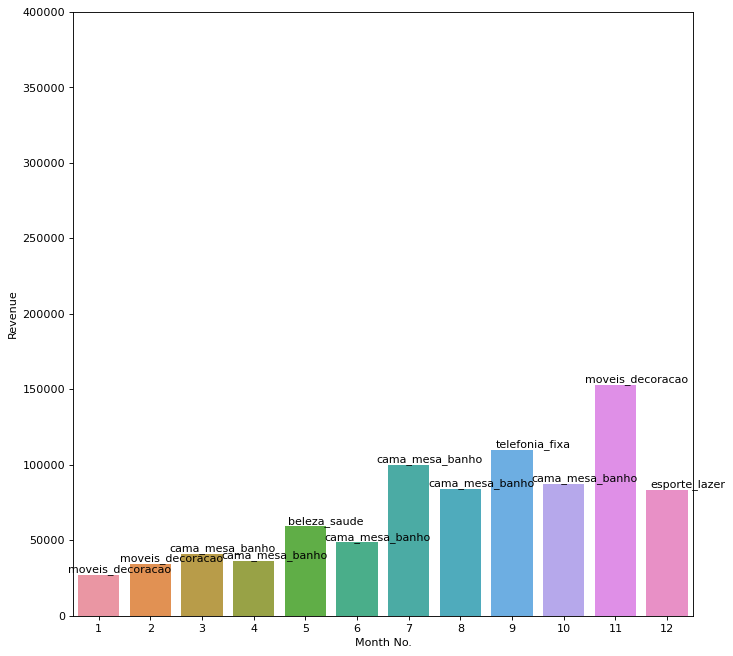

In [117]:
figure(figsize=(10, 10), dpi=80)
plt.xlim(0, 12)
plt.ylim(0, 400000)
ax = sns.barplot(x="Month No.", y="Revenue", data = req_df_2017) #plotting a bar graph for showing the categories sold the most (month-wise) in 2017
labels = ["moveis_decoracao","moveis_decoracao","cama_mesa_banho","cama_mesa_banho","beleza_saude","cama_mesa_banho","cama_mesa_banho","cama_mesa_banho","telefonia_fixa","cama_mesa_banho", "moveis_decoracao", "esporte_lazer"] #setting the categories as labels for the bar graph from product_category_month Dictionary
rects = ax.patches
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width(), height, label,
            ha='center', va='bottom')
#The Graph displays the most sold categories for the 12 different months. Their corresponding revenue is also displayed.          

In [118]:
product_category_order_id_revenue = pd.merge(revenue_2018, product_category_order_id, on="order_id") #merging the revenue_2018 and product_category_order_id Data Frames on the basis of order_id

In [119]:
product_category_order_id_revenue  #displaying the Data Frame created above

,order_id,order_purchase_timestamp,payment_value,product_id,product_category_name
0,4cbf1cc60a2d1704a70e11ee8be1510a,2018-01-01,130.03,2365562e74dd46f5e99cdc696c504cea,la_cuisine
1,40f5d5356396abbec18c0c893d329422,2018-01-01,167.20,547b95702aec86f05ac37e61d164891c,ferramentas_jardim
2,9cf86370700477e2bf11be1e7f3d16e6,2018-01-01,215.04,3879913e3a462abe3be99c14310898b5,relogios_presentes
3,45e4d1d16d017409456807846ea959e9,2018-01-01,153.27,0dce093fc7ec4dec214256df878e3c08,relogios_presentes
4,dd12ffa175ee0c7931890dd19db54427,2018-01-01,165.80,8c292ca193d326152e335d77176746f0,beleza_saude
...,...,...,...,...,...
61853,bee12e8653a04e76786e8891cfb6330a,2018-08-29,497.25,8d4dac6177fb8134f26fb4c5cc6c0aff,beleza_saude
61854,bee12e8653a04e76786e8891cfb6330a,2018-08-29,497.25,8d4dac6177fb8134f26fb4c5cc6c0aff,beleza_saude
61855,bee12e8653a04e76786e8891cfb6330a,2018-08-29,497.25,8d4dac6177fb8134f26fb4c5cc6c0aff,beleza_saude
61856,bee12e8653a04e76786e8891cfb6330a,2018-08-29,497.25,8d4dac6177fb8134f26fb4c5cc6c0aff,beleza_saude


In [120]:
#creating a dictionary with 71 key-value pairs. The keys are the different product categories and the value is a list with 8 elements (for 2018, we only have data for the first 8 months of the year)
product_category = {"beleza_saude": [0,0,0,0,0,0,0,0], " informatica_acessorios": [0,0,0,0,0,0,0,0], "automotivo": [0,0,0,0,0,0,0,0], "cama_mesa_banho": [0,0,0,0,0,0,0,0],
                   "moveis_decoracao": [0,0,0,0,0,0,0,0], "esporte_lazer": [0,0,0,0,0,0,0,0], "perfumaria": [0,0,0,0,0,0,0,0], "utilidades_domesticas": [0,0,0,0,0,0,0,0], "telefonia": [0,0,0,0,0,0,0,0], "relogios_presentes": [0,0,0,0,0,0,0,0],
                    "alimentos_bebidas": [0,0,0,0,0,0,0,0], "bebes": [0,0,0,0,0,0,0,0], "papelaria": [0,0,0,0,0,0,0,0], "tablets_impressao_imagem": [0,0,0,0,0,0,0,0], "brinquedos": [0,0,0,0,0,0,0,0], "telefonia_fixa": [0,0,0,0,0,0,0,0], "ferramentas_jardim": [0,0,0,0,0,0,0,0], "fashion_bolsas_e_acessorios": [0,0,0,0,0,0,0,0], "eletroportateis": [0,0,0,0,0,0,0,0], 
                    "consoles_games": [0,0,0,0,0,0,0,0], "audio": [0,0,0,0,0,0,0,0], "fashion_calcados": [0,0,0,0,0,0,0,0], "cool_stuff": [0,0,0,0,0,0,0,0], "malas_acessorios": [0,0,0,0,0,0,0,0], "climatizacao": [0,0,0,0,0,0,0,0], "construcao_ferramentas_construcao": [0,0,0,0,0,0,0,0], "moveis_cozinha_area_de_servico_jantar_e_jardim": [0,0,0,0,0,0,0,0], "construcao_ferramentas_jardim": [0,0,0,0,0,0,0,0], "fashion_roupa_masculina": [0,0,0,0,0,0,0,0], "pet_shop": [0,0,0,0,0,0,0,0], "moveis_escritorio": [0,0,0,0,0,0,0,0], "market_place": [0,0,0,0,0,0,0,0], "eletronicos": [0,0,0,0,0,0,0,0], "eletrodomesticos": [0,0,0,0,0,0,0,0], "artigos_de_festas": [0,0,0,0,0,0,0,0], "casa_conforto": [0,0,0,0,0,0,0,0], "construcao_ferramentas_ferramentas": [0,0,0,0,0,0,0,0], "agro_industria_e_comercio": [0,0,0,0,0,0,0,0],
                      "moveis_colchao_e_estofado": [0,0,0,0,0,0,0,0],  "livros_tecnicos": [0,0,0,0,0,0,0,0], "casa_construcao": [0,0,0,0,0,0,0,0], "instrumentos_musicais": [0,0,0,0,0,0,0,0], "moveis_sala": [0,0,0,0,0,0,0,0], "construcao_ferramentas_iluminacao": [0,0,0,0,0,0,0,0], "industria_comercio_e_negocios": [0,0,0,0,0,0,0,0], "alimento": [0,0,0,0,0,0,0,0], "artes": [0,0,0,0,0,0,0,0], "moveis_quarto": [0,0,0,0,0,0,0,0], "livros_interesse_geral": [0,0,0,0,0,0,0,0], "construcao_ferramentas_seguranca": [0,0,0,0,0,0,0,0], "fashion_underwear_e_moda_praia": [0,0,0,0,0,0,0,0], "fashion_esporte": [0,0,0,0,0,0,0,0], "sinalizacao_e_seguranca": [0,0,0,0,0,0,0,0], "pcs": [0,0,0,0,0,0,0,0], "artigos_de_natal": [0,0,0,0,0,0,0,0], "fashion_roupa_feminina": [0,0,0,0,0,0,0,0], "eletrodomesticos_2": [0,0,0,0,0,0,0,0],"livros_importados": [0,0,0,0,0,0,0,0], "bebidas": [0,0,0,0,0,0,0,0], "cine_foto": [0,0,0,0,0,0,0,0], "la_cuisine": [0,0,0,0,0,0,0,0], "musica": [0,0,0,0,0,0,0,0], "casa_conforto_2": [0,0,0,0,0,0,0,0], "portateis_casa_forno_e_cafe": [0,0,0,0,0,0,0,0], "cds_dvds_musicais": [0,0,0,0,0,0,0,0], "dvds_blu_ray": [0,0,0,0,0,0,0,0], "flores": [0,0,0,0,0,0,0,0], "artes_e_artesanato": [0,0,0,0,0,0,0,0], "fraldas_higiene": [0,0,0,0,0,0,0,0], "fashion_roupa_infanto_juvenil": [0,0,0,0,0,0,0,0], "seguros_e_servicos": [0,0,0,0,0,0,0,0]}

In [121]:
for i in range(61858):  #product_category_order_id_revenue has 61858 rows
    for key in product_category: #for each product category
        if(key == product_category_order_id_revenue['product_category_name'][i]): #if product category matches with the product category in product_category_order_id_revenue 
            month = product_category_order_id_revenue['order_purchase_timestamp'].dt.month[i] #find out the month of purchase from product_category_order_id_revenue Data Frame
            product_category[key][month-1] +=  product_category_order_id_revenue['payment_value'][i] #add the revenue at the appropriate index in the list (which is the value for product_category dictionary)

In [122]:
product_category

{'beleza_saude': [92201.40999999999,
  107925.53999999995,
  107440.60000000012,
  119457.92000000013,
  135334.33999999997,
  143591.17000000016,
  144430.48000000013,
  158063.72000000012],
 ' informatica_acessorios': [0, 0, 0, 0, 0, 0, 0, 0],
 'automotivo': [49737.020000000055,
  51586.49,
  57698.3,
  64222.15000000001,
  50351.30000000002,
  59569.04999999995,
  55165.330000000016,
  59449.86000000002],
 'cama_mesa_banho': [137231.48000000004,
  92730.3499999999,
  116769.84,
  123393.56000000001,
  120158.67999999992,
  116472.35999999993,
  97136.12000000007,
  99972.40999999997],
 'moveis_decoracao': [98050.92999999995,
  64442.38999999996,
  123172.90000000015,
  104412.01999999984,
  101114.46000000006,
  74444.00999999997,
  87132.0800000001,
  81934.04000000014],
 'esporte_lazer': [119566.54999999993,
  101187.34999999989,
  117645.29999999999,
  97103.98000000004,
  77275.92000000003,
  68488.17999999995,
  80382.03000000012,
  65539.13999999997],
 'perfumaria': [25929.649

In [138]:
months = {"1": [1], "2": [2], "3": [3], "4": [4], "5": [5], "6": [6], "7": [7], "8": [8]} #dictionary for months

In [139]:
product_category_month = {"1": "", "2": "", "3": "", "4": "", "5": "", "6": "", "7": "", "8": ""}  #dictionary for the storing the product category sold the most for the 8 months of 2018

In [140]:
maxv = {"1": [0] , "2": [0], "3": [0], "4": [0], "5": [0], "6": [0], "7": [0], "8": [0]} #This dictionary will store the revenue generated by the category generating the maximum revenue for the 8 different months 

In [141]:
for key1 in product_category_month: #for every key in product_category_month 
    maxval = 0  #initializing defalult value
    cat = ''    #initializing defalult value
    for key in product_category: #for every key in product_category dictionary ( 71 different product categories)
        if(maxval < product_category[key][(int)(key1)-1]): #checking for maximum revenue product_category wise
            maxval = product_category[key][(int)(key1)-1]  #updating the maximum revenue 
            cat = key #updating the category
    #after checking all product categories, we have the product category which generates the maximum revenue for a particuar month                          
    product_category_month[key1] += cat #store the category in the product_category_month dictionary
    maxv[key1][0] += maxval #store the maximum revenue in the maxv dictionary

In [142]:
maxv  #display the maxv dictionary

{'1': [137231.48000000004],
 '2': [107925.53999999995],
 '3': [123172.90000000015],
 '4': [123393.56000000001],
 '5': [145869.23],
 '6': [143591.17000000016],
 '7': [144430.48000000013],
 '8': [158063.72000000012]}

In [143]:
maxv_df = pd.DataFrame(data=maxv).T #create a Data Frame from a dictionary and Transpose it

In [144]:
maxv_df.columns = ["Revenue"]  #rename the column of the Data Frame created above

In [145]:
months_DataFrame = pd.DataFrame(data=months).T  #creating a Data Frame from the months dictionary and transposing it

In [146]:
months_DataFrame #displaying the months_DataFrame

,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8


In [147]:
months_DataFrame.columns = ["Month No."]  #renaming the column of the months_DataFrame DataFrame created above

In [148]:
req_df_2018 = pd.concat([months_DataFrame, maxv_df], axis = 1)  #concatenating the 2 Data Frames (months_DataFrame and maxv_df) together

In [149]:
req_df_2018 #displaying the req_df_2018 together

,Month No.,Revenue
1,1,137231.48
2,2,107925.54
3,3,123172.90
4,4,123393.56
5,5,145869.23
6,6,143591.17
7,7,144430.48
8,8,158063.72


In [150]:
product_category_month  #displaying the product_category_month dictionary

{'1': 'cama_mesa_banho',
 '2': 'beleza_saude',
 '3': 'moveis_decoracao',
 '4': 'cama_mesa_banho',
 '5': 'relogios_presentes',
 '6': 'beleza_saude',
 '7': 'beleza_saude',
 '8': 'beleza_saude'}

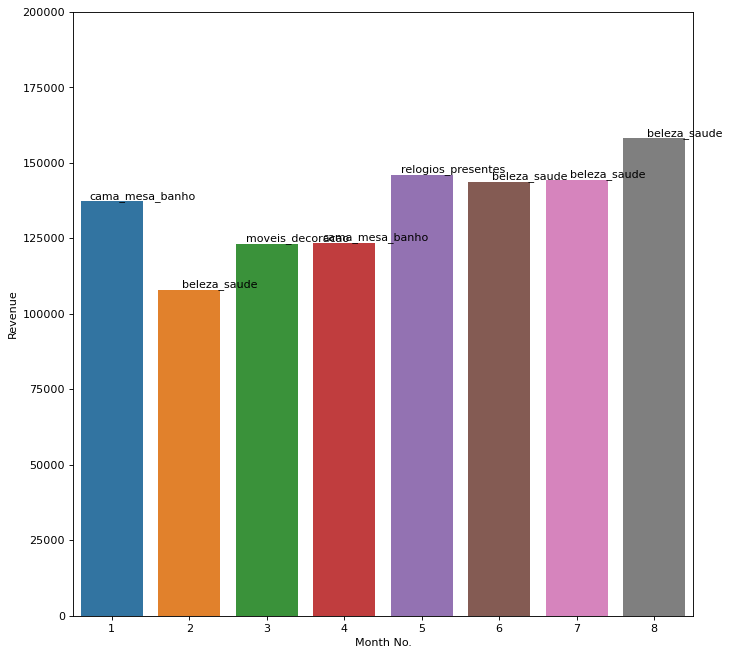

In [151]:
figure(figsize=(10, 10), dpi=80)
plt.xlim(0, 12)
plt.ylim(0, 200000)
ax = sns.barplot(x="Month No.", y="Revenue", data = req_df_2018) #plotting a bar graph for showing the categories sold the most (month-wise) in 2018
labels = ["cama_mesa_banho","beleza_saude","moveis_decoracao","cama_mesa_banho","relogios_presentes","beleza_saude","beleza_saude","beleza_saude"]#setting the categories as labels for the bar graph from product_category_month Dictionary
rects = ax.patches
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width(), height, label,
            ha='center', va='bottom')
#The Graph displays the most sold categories for the 8 different months of 2018. Their corresponding revenue is also displayed.       